# Week - 2 Excercise - 2 - DSE 3159
By-

Pratinav Seth 200968216

Using the Body Fat dataset, design a Neural Network to predict body fat. Accurate measurement of 
body fat is inconvenient/costly and it is desirable to have easy methods of predicting Body Fat.
The attributes are :
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

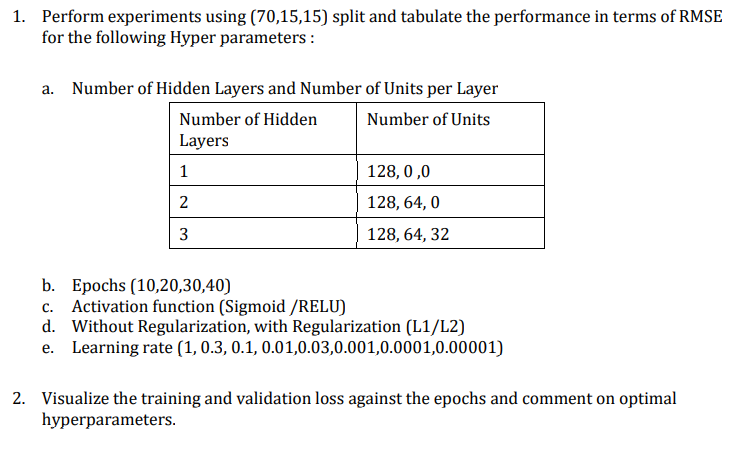

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.losses import mean_squared_error
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/bodyfat.csv")

In [3]:
scaler = MinMaxScaler()
df["Age"] = df["Age"]/100.00
df[["Density","Weight","Height","Neck","Chest","Abdomen","Hip","Thigh","Knee","Ankle","Biceps","Forearm","Wrist"]] = scaler.fit_transform(df[["Density","Weight","Height","Neck","Chest","Abdomen","Hip","Thigh","Knee","Ankle","Biceps","Forearm","Wrist"]])

In [4]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [5]:
y = df['BodyFat']
X = df.drop(['BodyFat'], axis=1)

In [6]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
epochs_total = 50
batchsize = 16

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

 # NOTES:-

 - We have made three functions for each neural network having variation in No of Hidden Layers.

 - We consider all permutations of hyperparameters in terms of total epochs,learning rate, activation functions and regularizations for each hidden layer keeping Batch Size as 16, Optimizer as Adam and loss function as rmse and make a list of them which we enter to the function.

 - We get the logs of model training , graph of loss vs epoch showing training vs validation loss and the function returns validation and test set rmse which is stored in a list alongside hyperparameters used to obtain it .
 - Which is later converted to an excel sheet to observe eaily as the whole experiment takes around 8hrs of compute considering the whole experiment takes 8hrs of compute time as the high no of permutations of hyperparameters as noted below:
  1. One Hidden Layer - 192 - https://drive.google.com/file/d/1dSSxL8AgwiaxzIaxBKccSCDaTVnpxWzu/view?usp=sharing
  2. Two Hidden Layer - 1152 - https://drive.google.com/file/d/1QB6EGZq6CTxBUe5JvTRidltBUG-DvwDp/view?usp=sharing
  3. Three Hidden Layer - 6912 - https://drive.google.com/file/d/1FwmTC4AK_gvXOX476zWiffvkReQ3H2ns/view?usp=sharing

- Due to this we are unable to upload the notebook to MS Teams and are uploading an inference version instead showing the best three models for each category. Although , I am sharing the link to Kaggle Notebook as well as each model excel sheet of results.

Kaggle Notebook - https://www.kaggle.com/code/pratinavseth/keras-tuner-mlp-scratch



In [8]:
df1 = pd.read_csv("/content/onehidden.csv")
df1.sort_values(by = ['loss_t', 'loss_e'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
107,107,"(30, 0.3, 'relu', None)",1.933210,0.644611
158,158,"(40, 0.1, 'sigmoid', None)",2.007576,0.717241
172,172,"(40, 0.03, 'relu', 'l2')",2.526953,0.779587
58,58,"(20, 0.3, 'relu', 'l2')",2.038983,0.807308
105,105,"(30, 0.3, 'relu', 'l1')",2.065512,0.853676


In [9]:
df1.sort_values(by = ['loss_e', 'loss_t'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
107,107,"(30, 0.3, 'relu', None)",1.933210,0.644611
158,158,"(40, 0.1, 'sigmoid', None)",2.007576,0.717241
58,58,"(20, 0.3, 'relu', 'l2')",2.038983,0.807308
105,105,"(30, 0.3, 'relu', 'l1')",2.065512,0.853676
108,108,"(30, 0.1, 'sigmoid', 'l1')",2.068300,0.972286


In [10]:
def hyper_train_layer1(epochs_total,lr,act1,actr1):
  model = keras.Sequential(
      [
        keras.layers.Dense(units=128, activation=act1, input_shape=(x_train.shape[-1],),activity_regularizer=actr1 ),
        keras.layers.Dense(units=1, activation="linear"),
      ]
  )
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
  opt = keras.optimizers.Adam(learning_rate=lr)
  history = model.compile(optimizer = opt, loss = root_mean_squared_error, metrics =[tf.keras.metrics.RootMeanSquaredError()])
  history = model.fit(
    x=x_train,
    y=y_train,
    validation_data = (x_val,y_val),
    batch_size=16,
    epochs=epochs_total)
  
  print(epochs_total,batchsize,lr)
  sns.set_style("darkgrid")
  acc = history.history['root_mean_squared_error']
  val_acc = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'b', label='root_mean_squared_error')
  plt.plot(epochs, val_acc, 'r', label='val_root_mean_squared_error')
  plt.xlabel('Epoch #')
  plt.ylabel('root_mean_squared_error')
  plt.title('Training and Validation root_mean_squared_error')
  plt.legend()


  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  _,eval_rmse = model.evaluate(x_val,y_val)
  _,test_rmse = model.evaluate(x_test, y_test)
  return eval_rmse,test_rmse

Epoch 1/30
11/11 [==============================] - 1s 19ms/step - loss: 11.0611 - root_mean_squared_error: 13.5396 - val_loss: 6.8829 - val_root_mean_squared_error: 8.3664
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 5.1554 - root_mean_squared_error: 6.5703 - val_loss: 6.1686 - val_root_mean_squared_error: 7.8115
Epoch 3/30
11/11 [==============================] - 0s 3ms/step - loss: 4.2582 - root_mean_squared_error: 5.1515 - val_loss: 5.6478 - val_root_mean_squared_error: 7.2301
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 3.3723 - root_mean_squared_error: 4.1604 - val_loss: 4.8227 - val_root_mean_squared_error: 6.7895
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 3.1533 - root_mean_squared_error: 3.8672 - val_loss: 3.5116 - val_root_mean_squared_error: 4.4145
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 2.4416 - root_mean_squared_error: 3.0360 - val_loss: 2.7427 - val_root_mean

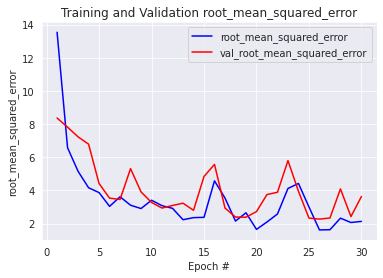

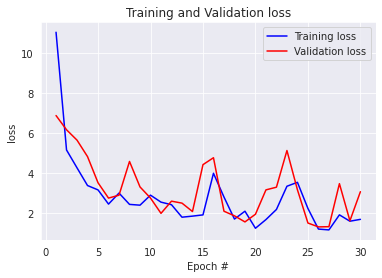

2/2 [==============================] - 0s 4ms/step - loss: 2.3873 - root_mean_squared_error: 2.7543
Epoch 1/40
11/11 [==============================] - 0s 16ms/step - loss: 8.7519 - root_mean_squared_error: 11.0046 - val_loss: 9.6023 - val_root_mean_squared_error: 11.7493
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 6.2375 - root_mean_squared_error: 7.5074 - val_loss: 6.7420 - val_root_mean_squared_error: 8.3404
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 4.7353 - root_mean_squared_error: 5.7316 - val_loss: 5.1567 - val_root_mean_squared_error: 6.4748
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 3.7760 - root_mean_squared_error: 4.6012 - val_loss: 5.9492 - val_root_mean_squared_error: 7.1485
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 3.1889 - root_mean_squared_error: 3.9980 - val_loss: 3.9164 - val_root_mean_squared_error: 4.6800
Epoch 6/40
11/11 [=============================

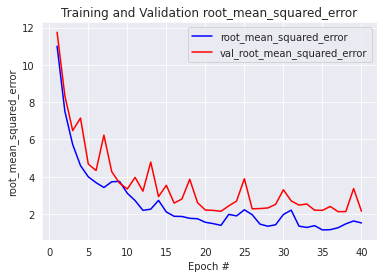

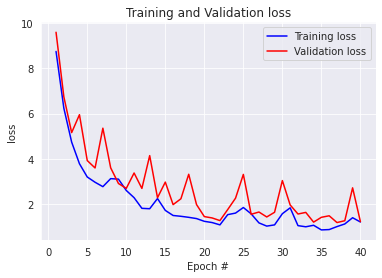

2/2 [==============================] - 0s 6ms/step - loss: 0.8262 - root_mean_squared_error: 1.3135
Epoch 1/40
11/11 [==============================] - 1s 35ms/step - loss: 11.9174 - root_mean_squared_error: 13.8328 - val_loss: 9.3031 - val_root_mean_squared_error: 9.5237
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 6.9141 - root_mean_squared_error: 7.3916 - val_loss: 7.9967 - val_root_mean_squared_error: 8.8530
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 5.8283 - root_mean_squared_error: 6.1803 - val_loss: 7.5950 - val_root_mean_squared_error: 8.4649
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 5.1269 - root_mean_squared_error: 5.5177 - val_loss: 6.9829 - val_root_mean_squared_error: 7.6940
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 4.8854 - root_mean_squared_error: 5.3422 - val_loss: 6.4564 - val_root_mean_squared_error: 7.3790
Epoch 6/40
11/11 [=============================

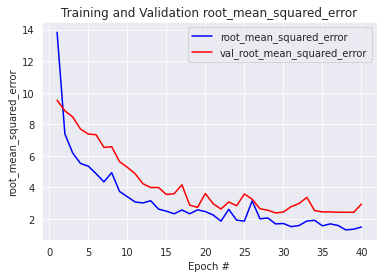

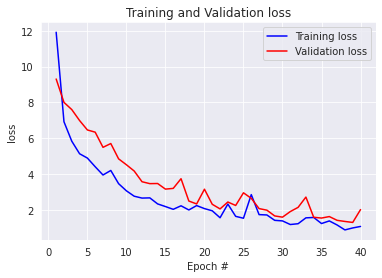

2/2 [==============================] - 0s 5ms/step - loss: 1.6264 - root_mean_squared_error: 1.9121


(2.939512252807617, 1.9120912551879883)

In [11]:
hyper_train_layer1(30, 0.3, 'relu', None)	
hyper_train_layer1(40, 0.1, 'sigmoid', None)
hyper_train_layer1(40, 0.03, 'relu', 'l2')

The optimal hyperparameter for one hidden layer model, we can observe has-

- epochs - 30/40
- Activation - Relu
- Learning rate - 0.1/0.3/0.03
- Regularization - None/l2

However based on loss of Visualize the training and validation loss against the epochs we conclude following as most optimal hyperparameters.

- epochs - 40
- Activation - Relu
- Learning rate - 0.03
- Regularization - l2


In [ ]:
#dont run unless you want to repeat all experiments
hyper_list1 = []
epochs= [10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
activations = ['sigmoid','relu']
regularizers = ['l1','l2',None]
for x in epochs:
  for y in learning_rate:
    for z1 in activations:
        for r1 in regularizers:
            hyper_list1.append((x,y,z1,r1))

loss_list_e = []
loss_list_t = []
for x,y,z1,r1 in hyper_list1 :
  eval_rmse,test_rmse = hyper_train_layer1(epochs_total=x,lr=y,act1=z1,actr1=r1)
  loss_list_e.append(eval_rmse)
  loss_list_t.append(test_rmse)

In [ ]:
#dont run unless you want to repeat all experiments
print(len(hyper_list1))
print(min(loss_list_t))
x = loss_list_t.index(min(loss_list_t))
print(hyper_list1[x])
dict = {'hyper': hyper_list1, 'loss_e': loss_list_e, 'loss_t': loss_list_t}  
df = pd.DataFrame(dict) 
df.to_csv("onehidden.csv")
df.head()

In [12]:
df2 = pd.read_csv("/content/twohidden.csv")
df2.sort_values(by = ['loss_t', 'loss_e'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
1011,1011,"(40, 0.03, 'sigmoid', 'sigmoid', 'l2', 'l1')",2.535243,0.435650
986,986,"(40, 0.01, 'sigmoid', 'relu', 'l2', None)",2.410898,0.464534
1022,1022,"(40, 0.03, 'sigmoid', 'relu', 'l2', None)",2.264109,0.474066
1012,1012,"(40, 0.03, 'sigmoid', 'sigmoid', 'l2', 'l2')",2.324723,0.500583
1023,1023,"(40, 0.03, 'sigmoid', 'relu', None, 'l1')",2.123047,0.548541


In [13]:
df2.sort_values(by = ['loss_e', 'loss_t'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
945,945,"(40, 0.1, 'sigmoid', 'relu', 'l1', 'l1')",1.766709,1.000531
373,373,"(20, 0.1, 'sigmoid', 'relu', 'l2', 'l2')",1.771517,1.050306
952,952,"(40, 0.1, 'sigmoid', 'relu', None, 'l2')",1.780366,1.171192
370,370,"(20, 0.1, 'sigmoid', 'relu', 'l1', 'l2')",1.817486,1.033939
662,662,"(30, 0.1, 'sigmoid', 'relu', 'l2', None)",1.830326,0.925028


In [14]:
def hyper_train_layer2(epochs_total,lr,act1,act2,actr1,actr2):
  model = keras.Sequential(
      [
        keras.layers.Dense(units=128, activation=act1, input_shape=(x_train.shape[-1],),activity_regularizer=actr1 ),
        keras.layers.Dense(units=64, activation=act2,activity_regularizer=actr2),
        keras.layers.Dense(units=1, activation="linear"),
      ]
  )
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
  opt = keras.optimizers.Adam(learning_rate=lr)
  history = model.compile(optimizer = opt, loss = root_mean_squared_error, metrics =[tf.keras.metrics.RootMeanSquaredError()])
  history = model.fit(
    x=x_train,
    y=y_train,
    validation_data = (x_val,y_val),
    batch_size=16,
    epochs=epochs_total)
  
  print(epochs_total,batchsize,lr)
  sns.set_style("darkgrid")
  acc = history.history['root_mean_squared_error']
  val_acc = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'b', label='root_mean_squared_error')
  plt.plot(epochs, val_acc, 'r', label='val_root_mean_squared_error')
  plt.xlabel('Epoch #')
  plt.ylabel('root_mean_squared_error')
  plt.title('Training and Validation root_mean_squared_error')
  plt.legend()


  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  _,eval_rmse = model.evaluate(x_val,y_val)
  _,test_rmse = model.evaluate(x_test, y_test)
  return eval_rmse,test_rmse

Epoch 1/40
11/11 [==============================] - 1s 19ms/step - loss: 12.4654 - root_mean_squared_error: 14.4029 - val_loss: 10.4307 - val_root_mean_squared_error: 12.0646
Epoch 2/40
11/11 [==============================] - 0s 5ms/step - loss: 7.5263 - root_mean_squared_error: 8.6419 - val_loss: 8.1361 - val_root_mean_squared_error: 9.7153
Epoch 3/40
11/11 [==============================] - 0s 6ms/step - loss: 7.3763 - root_mean_squared_error: 8.5540 - val_loss: 8.1038 - val_root_mean_squared_error: 9.8003
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 7.1593 - root_mean_squared_error: 8.2794 - val_loss: 8.2599 - val_root_mean_squared_error: 9.8000
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 7.2338 - root_mean_squared_error: 8.2123 - val_loss: 8.4854 - val_root_mean_squared_error: 10.1040
Epoch 6/40
11/11 [==============================] - 0s 6ms/step - loss: 7.0813 - root_mean_squared_error: 8.0893 - val_loss: 8.2765 - val_root_m

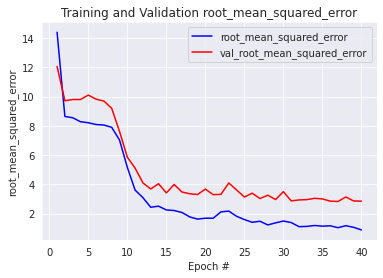

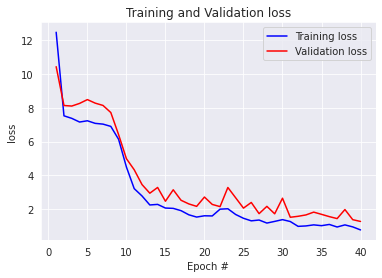

2/2 [==============================] - 0s 7ms/step - loss: 0.8045 - root_mean_squared_error: 1.0979
Epoch 1/40
11/11 [==============================] - 1s 17ms/step - loss: 10.9262 - root_mean_squared_error: 12.9471 - val_loss: 9.8910 - val_root_mean_squared_error: 11.9814
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 7.9917 - root_mean_squared_error: 9.5001 - val_loss: 8.6708 - val_root_mean_squared_error: 10.2732
Epoch 3/40
11/11 [==============================] - 0s 4ms/step - loss: 6.9424 - root_mean_squared_error: 7.9100 - val_loss: 7.6943 - val_root_mean_squared_error: 9.1063
Epoch 4/40
11/11 [==============================] - 0s 5ms/step - loss: 6.6955 - root_mean_squared_error: 7.7341 - val_loss: 7.8476 - val_root_mean_squared_error: 9.2575
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 6.4540 - root_mean_squared_error: 7.3241 - val_loss: 7.3017 - val_root_mean_squared_error: 8.5832
Epoch 6/40
11/11 [===========================

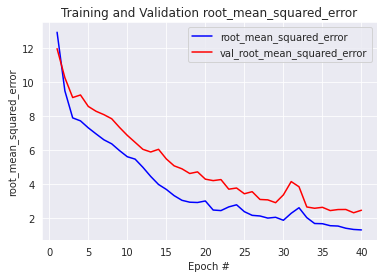

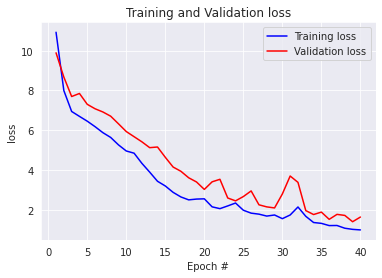

2/2 [==============================] - 0s 13ms/step - loss: 1.1430 - root_mean_squared_error: 1.5404
Epoch 1/40
11/11 [==============================] - 1s 30ms/step - loss: 9.3300 - root_mean_squared_error: 11.5829 - val_loss: 9.7317 - val_root_mean_squared_error: 11.5463
Epoch 2/40
11/11 [==============================] - 0s 9ms/step - loss: 6.8994 - root_mean_squared_error: 7.8774 - val_loss: 7.6647 - val_root_mean_squared_error: 9.1060
Epoch 3/40
11/11 [==============================] - 0s 8ms/step - loss: 5.7014 - root_mean_squared_error: 6.4873 - val_loss: 6.4336 - val_root_mean_squared_error: 7.5626
Epoch 4/40
11/11 [==============================] - 0s 7ms/step - loss: 5.0331 - root_mean_squared_error: 5.8041 - val_loss: 6.6264 - val_root_mean_squared_error: 7.8926
Epoch 5/40
11/11 [==============================] - 0s 8ms/step - loss: 4.1067 - root_mean_squared_error: 4.8434 - val_loss: 5.0580 - val_root_mean_squared_error: 5.9039
Epoch 6/40
11/11 [============================

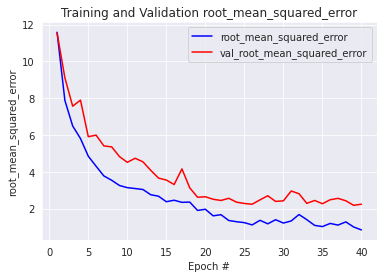

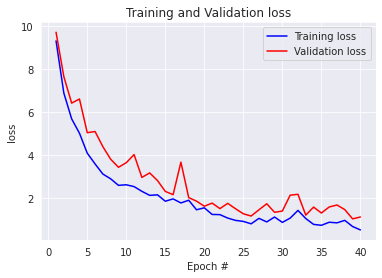

2/2 [==============================] - 0s 10ms/step - loss: 0.7688 - root_mean_squared_error: 1.1689


(2.235161542892456, 1.1688594818115234)

In [15]:
hyper_train_layer2(40, 0.03, 'sigmoid', 'sigmoid', 'l2', 'l1')
hyper_train_layer2(40, 0.01, 'sigmoid', 'relu', 'l2', None)
hyper_train_layer2(40, 0.03, 'sigmoid', 'relu', 'l2', None)

The optimal hyperparameter for two hidden layer model, we can observe has-

- epochs - 40
- Activation-1 - Sigmoid
- Activation-2 - Relu
- Learning rate - 0.1/0.01/0.03
- Regularization-1 - None/l2
- Regularization-2 - None/l2/l1

However based on loss of Visualize the training and validation loss against the epochs we conclude following as most optimal hyperparameters.

- epochs - 40
- Activation-1 - Sigmoid
- Activation-2 - Relu
- Learning rate - 0.01
- Regularization-1 - l2
- Regularization-2 - None

In [ ]:
#dont run unless you want to repeat all experiments
hyper_list2 = []
epochs= [10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
activations = ['sigmoid','relu']
regularizers = ['l1','l2',None]
for x in epochs:
  for y in learning_rate:
    for z1 in activations:
      for z2 in activations:
          for r1 in regularizers:
            for r2 in regularizers:
                hyper_list2.append((x,y,z1,z2,r1,r2))

loss_list_e = []
loss_list_t = []
for x,y,z1,z2,r1,r2 in hyper_list2 :
  eval_rmse,test_rmse = hyper_train_layer2(epochs_total=x,lr=y,act1=z1,act2=z2,actr1=r1,actr2=r2)
  loss_list_e.append(eval_rmse)
  loss_list_t.append(test_rmse)

In [ ]:
#dont run unless you want to repeat all experiments
print(len(hyper_list2))
print(min(loss_list_t))
x = loss_list_t.index(min(loss_list_t))
print(hyper_list2[x])
dict = {'hyper': hyper_list2, 'loss_e': loss_list_e, 'loss_t': loss_list_t}  
df = pd.DataFrame(dict) 
df.to_csv("twohidden.csv")

In [16]:
df3 = pd.read_csv("/content/threehidden.csv")
df3.sort_values(by = ['loss_t', 'loss_e'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
6102,6102,"(40, 0.03, 'sigmoid', 'relu', 'sigmoid', 'l1',...",2.347817,0.411711
5733,5733,"(40, 0.1, 'relu', 'sigmoid', 'sigmoid', 'l2', ...",2.381912,0.438606
6168,6168,"(40, 0.03, 'relu', 'sigmoid', 'sigmoid', 'l2',...",2.337536,0.453291
4392,4392,"(30, 0.03, 'sigmoid', 'relu', 'sigmoid', None,...",2.349293,0.491723
6137,6137,"(40, 0.03, 'sigmoid', 'relu', 'relu', 'l1', No...",2.218032,0.494157


In [17]:
df3.sort_values(by = ['loss_e', 'loss_t'], ascending = [True, True]).head()

,Unnamed: 0,hyper,loss_e,loss_t
6076,6076,"(40, 0.03, 'sigmoid', 'sigmoid', 'relu', 'l1',...",1.674797,0.998473
4356,4356,"(30, 0.03, 'sigmoid', 'sigmoid', 'relu', 'l2',...",1.699130,1.214928
6075,6075,"(40, 0.03, 'sigmoid', 'sigmoid', 'relu', 'l1',...",1.711806,1.153010
6079,6079,"(40, 0.03, 'sigmoid', 'sigmoid', 'relu', 'l1',...",1.727401,1.003565
5890,5890,"(40, 0.01, 'sigmoid', 'relu', 'sigmoid', 'l1',...",1.764491,0.597945


In [18]:
def hyper_train_layer3(epochs_total,lr,act1,act2,act3,actr1,actr2,actr3):
  model = keras.Sequential(
      [
        keras.layers.Dense(units=128, activation=act1, input_shape=(x_train.shape[-1],),activity_regularizer=actr1 ),
        keras.layers.Dense(units=64, activation=act2,activity_regularizer=actr2),
        keras.layers.Dense(units=32, activation=act3,activity_regularizer=actr3),
       keras.layers.Dense(units=1, activation="linear"),
      ]
  )
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
  opt = keras.optimizers.Adam(learning_rate=lr)
  history = model.compile(optimizer = opt, loss = root_mean_squared_error, metrics =[tf.keras.metrics.RootMeanSquaredError()])
  history = model.fit(
    x=x_train,
    y=y_train,
    validation_data = (x_val,y_val),
    batch_size=16,
    epochs=epochs_total)
  
  print(epochs_total,batchsize,lr)
  sns.set_style("darkgrid")
  acc = history.history['root_mean_squared_error']
  val_acc = history.history['val_root_mean_squared_error']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'b', label='root_mean_squared_error')
  plt.plot(epochs, val_acc, 'r', label='val_root_mean_squared_error')
  plt.xlabel('Epoch #')
  plt.ylabel('root_mean_squared_error')
  plt.title('Training and Validation root_mean_squared_error')
  plt.legend()


  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  _,eval_rmse = model.evaluate(x_val,y_val)
  _,test_rmse = model.evaluate(x_test, y_test)
  return eval_rmse,test_rmse

Epoch 1/40
11/11 [==============================] - 2s 40ms/step - loss: 14.2215 - root_mean_squared_error: 15.2779 - val_loss: 13.0045 - val_root_mean_squared_error: 14.8607
Epoch 2/40
11/11 [==============================] - 0s 12ms/step - loss: 9.1552 - root_mean_squared_error: 10.6453 - val_loss: 9.5865 - val_root_mean_squared_error: 11.1032
Epoch 3/40
11/11 [==============================] - 0s 16ms/step - loss: 7.4139 - root_mean_squared_error: 8.3651 - val_loss: 8.3498 - val_root_mean_squared_error: 9.8340
Epoch 4/40
11/11 [==============================] - 0s 15ms/step - loss: 7.1568 - root_mean_squared_error: 8.1724 - val_loss: 8.1432 - val_root_mean_squared_error: 9.7203
Epoch 5/40
11/11 [==============================] - 0s 13ms/step - loss: 7.0574 - root_mean_squared_error: 8.1281 - val_loss: 8.0375 - val_root_mean_squared_error: 9.5880
Epoch 6/40
11/11 [==============================] - 0s 10ms/step - loss: 6.3823 - root_mean_squared_error: 7.3408 - val_loss: 7.0779 - val_

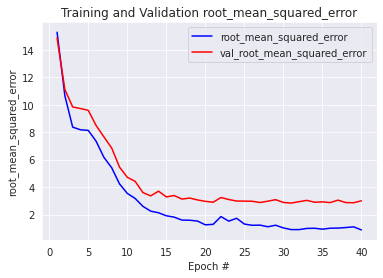

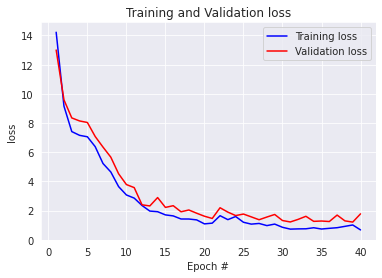

2/2 [==============================] - 0s 10ms/step - loss: 1.4740 - root_mean_squared_error: 1.5204
Epoch 1/40
11/11 [==============================] - 2s 49ms/step - loss: 9.9003 - root_mean_squared_error: 11.2567 - val_loss: 8.2992 - val_root_mean_squared_error: 9.8457
Epoch 2/40
11/11 [==============================] - 0s 11ms/step - loss: 7.6273 - root_mean_squared_error: 8.8990 - val_loss: 8.0453 - val_root_mean_squared_error: 9.6229
Epoch 3/40
11/11 [==============================] - 0s 10ms/step - loss: 6.6846 - root_mean_squared_error: 7.6954 - val_loss: 6.6760 - val_root_mean_squared_error: 7.8606
Epoch 4/40
11/11 [==============================] - 0s 12ms/step - loss: 5.5820 - root_mean_squared_error: 6.3826 - val_loss: 6.3034 - val_root_mean_squared_error: 7.5889
Epoch 5/40
11/11 [==============================] - 0s 8ms/step - loss: 5.5929 - root_mean_squared_error: 6.2439 - val_loss: 5.7558 - val_root_mean_squared_error: 7.0395
Epoch 6/40
11/11 [==========================

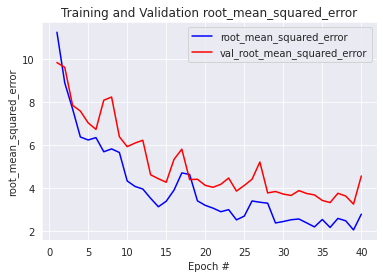

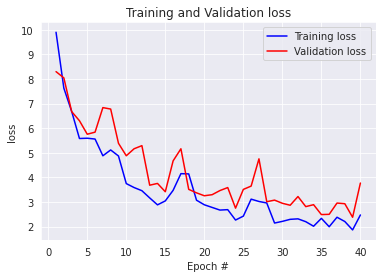

2/2 [==============================] - 0s 6ms/step - loss: 2.5992 - root_mean_squared_error: 2.9935
Epoch 1/40
11/11 [==============================] - 1s 22ms/step - loss: 14.0602 - root_mean_squared_error: 15.9142 - val_loss: 13.0993 - val_root_mean_squared_error: 15.3181
Epoch 2/40
11/11 [==============================] - 0s 4ms/step - loss: 9.3918 - root_mean_squared_error: 11.0918 - val_loss: 9.8533 - val_root_mean_squared_error: 11.6978
Epoch 3/40
11/11 [==============================] - 0s 5ms/step - loss: 7.3650 - root_mean_squared_error: 8.6470 - val_loss: 8.4062 - val_root_mean_squared_error: 10.1418
Epoch 4/40
11/11 [==============================] - 0s 4ms/step - loss: 6.8353 - root_mean_squared_error: 7.9434 - val_loss: 7.8334 - val_root_mean_squared_error: 9.4950
Epoch 5/40
11/11 [==============================] - 0s 4ms/step - loss: 6.0870 - root_mean_squared_error: 7.0855 - val_loss: 6.8690 - val_root_mean_squared_error: 8.4481
Epoch 6/40
11/11 [========================

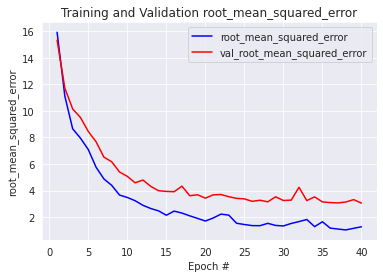

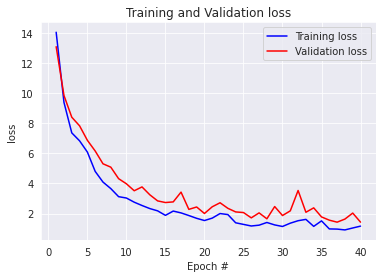

2/2 [==============================] - 0s 8ms/step - loss: 0.9614 - root_mean_squared_error: 1.3244


(3.0597002506256104, 1.3243625164031982)

In [19]:
hyper_train_layer3(40, 0.03, 'sigmoid', 'relu', 'sigmoid', 'l1', 'l1', 'l1')	
hyper_train_layer3(40, 0.1, 'relu', 'sigmoid', 'sigmoid', 'l2', 'l1', 'l1')	
hyper_train_layer3(40, 0.03, 'relu', 'sigmoid', 'sigmoid', 'l2', 'l2', 'l1')	

The optimal hyperparameter for three hidden layer model, we can observe has-

- epochs - 40/30
- Activation-1 - Sigmoid/Relu
- Activation-2 - Sigmoid
- Activation-3 - Sigmoid/Relu
- Learning rate - 0.1/0.01/0.03
- Regularization-1 - None/l2/l1
- Regularization-2 - l2/l1
- Regularization-2 - l2/l1

However based on loss of Visualize the training and validation loss against the epochs we conclude following as most optimal hyperparameters.

- epochs - 40
- Activation-1 - Relu
- Activation-2 - Sigmoid
- Activation-3 - Sigmoid/Relu
- Learning rate - 0.03
- Regularization-1 - l2
- Regularization-2 - l2
- Regularization-2 - l1	

In [ ]:
#dont run unless you want to repeat all experiments
hyper_list3 = []
epochs= [10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
activations = ['sigmoid','relu']
regularizers = ['l1','l2',None]
for x in epochs:
  for y in learning_rate:
    for z1 in activations:
      for z2 in activations:
        for z3 in activations:
            for r1 in regularizers:
              for r2 in regularizers:
                for r3 in regularizers:
                    hyper_list3.append((x,y,z1,z2,z3,r1,r2,r3))

loss_list_e = []
loss_list_t = []
for x,y,z1,z2,z3,r1,r2,r3 in hyper_list3 :
  eval_rmse,test_rmse = hyper_train_layer3(epochs_total=x,lr=y,act1=z1,act2=z2,act3=z3,actr1=r1,actr2=r2,actr3=r3)
  loss_list_e.append(eval_rmse)
  loss_list_t.append(test_rmse)

In [ ]:
#dont run unless you want to repeat all experiments
print(len(hyper_list3))
print(min(loss_list_t))
x = loss_list_t.index(min(loss_list_t))
print(hyper_list3[x])
dict = {'hyper': hyper_list3, 'loss_e': loss_list_e, 'loss_t': loss_list_t}  
df = pd.DataFrame(dict) 
df.to_csv("threehidden.csv")